# Exploratory Data Analysis


## 1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji

## 2. Reading data

In [2]:
df = pd.read_parquet('../data/03.cleaned/df_combined.parquet')

In [3]:
df

,in_reply_to_user_id,reply_settings,author_id,context_annotations,id,text,edit_controls,referenced_tweets,created_at,edit_history_tweet_ids,...,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,text_clean_demojized,emoji_count_en,emoji_count,name
0,375146901.0,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846277256509116672,"@donaldtusk Niezrealizowanie większości ze ""10...",{'editable_until': '2024-10-15 20:49:34+00:00'...,"[{'id': '1846091776269963695', 'type': 'replie...",2024-10-15 19:49:34+00:00,[1846277256509116623],...,1,33,0,1555,"Failure to implement most of the ""100 specifi...","Failure to implement most of the ""100 specifi...","Niezrealizowanie większości ze ""100 konkretów...",0,0,Bartłomiej Pejo
1,NaN,everyone,1.182212e+09,[{'domain': {'description': 'Named people in t...,1846222583898784000,Rok po wyborach trzeba powiedzieć jedno - nie ...,{'editable_until': '2024-10-15 17:12:19+00:00'...,None,2024-10-15 16:12:19+00:00,[1846222583898784025],...,2,72,0,3031,"A year after the elections, one thing must be ...","A year after the elections, one thing must be ...",Rok po wyborach trzeba powiedzieć jedno - nie ...,0,0,Bartłomiej Pejo
2,NaN,everyone,1.182212e+09,None,1846161400328028160,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",{'editable_until': '2024-10-15 13:09:12+00:00'...,None,2024-10-15 12:09:12+00:00,[1846161400328028272],...,3,33,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,":cross_mark: Mamy rok po wyborach, a Polska p...",1,1,Bartłomiej Pejo
3,NaN,everyone,1.182212e+09,None,1846091824101769472,Mija rok od wyborów parlamentarnych. W kampani...,{'editable_until': '2024-10-15 08:32:44+00:00'...,None,2024-10-15 07:32:44+00:00,[1846091824101769490],...,2,38,0,2441,A year has passed since the parliamentary elec...,A year has passed since the parliamentary elec...,Mija rok od wyborów parlamentarnych. W kampani...,0,0,Bartłomiej Pejo
4,NaN,everyone,1.182212e+09,None,1846075343188144128,#Idę11 🇵 🇱 https://t.co/KiCe5ATOpX,{'editable_until': '2024-10-15 07:27:14+00:00'...,None,2024-10-15 06:27:14+00:00,[1846075343188144153],...,18,616,2,8634,#I'm going11 🇵 🇱,#I'm going11 🇵 🇱,#Idę11 🇵 🇱,2,2,Bartłomiej Pejo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48326,NaN,everyone,9.611819e+08,None,1707719554355380480,"Studiujesz na kierunku lekarskim, pielęgniarst...",{'editable_until': '2023-09-29 12:30:44+00:00'...,None,2023-09-29 11:30:44+00:00,[1707719554355380484],...,0,6,0,2154,"Are you studying medicine, nursing or emergenc...","Are you studying medicine, nursing or emergenc...","Studiujesz na kierunku lekarskim, pielęgniarst...",0,0,Adam Struzik
48327,NaN,everyone,9.611819e+08,None,1704120323023454464,Za nami posiedzenie @SejmikMaz. I kolejne wspa...,{'editable_until': '2023-09-19 14:08:40+00:00'...,None,2023-09-19 13:08:40+00:00,[1704120323023454339],...,0,15,0,649,The meeting is over. And further support for t...,The meeting is over. And further support for t...,Za nami posiedzenie . I kolejne wsparcie dla m...,0,0,Adam Struzik
48328,NaN,everyone,9.611819e+08,None,1702668459576786944,Płockie Centrum Onkologii gotowe! Już na począ...,{'editable_until': '2023-09-15 13:59:29+00:00'...,None,2023-09-15 12:59:29+00:00,[1702668459576787064],...,0,16,0,581,The Płock Oncology Center is ready! It will ac...,The Płock Oncology Center is ready! It will ac...,Płockie Centrum Onkologii gotowe! Już na począ...,0,0,Adam Struzik
48329,NaN,everyone,9.611819e+08,None,1701960909369868544,To jedna z największych inwestycji drogowych @...,{'editable_until': '2023-09-13 15:07:56+00:00'...,None,2023-09-13 14:07:56+00:00,[1701960909369868437],...,0,13,0,621,This is one of the largest road investments ...,This is one of the largest road investments \...,To jedna z największych inwestycji drogowych ...,0,0,Adam Struzik


## 3. Exploratory Data Analysis

### 3.1 Categories of tweets

category
Original    32630
Reply       10291
Quote        5410
Name: count, dtype: int64
Total tweets: 48331


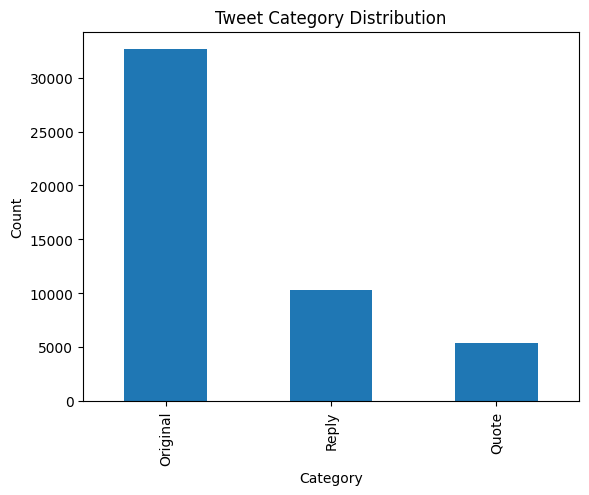

In [4]:
# Plot the category summary as a bar plot
category_summary = df['category'].value_counts()
print(category_summary)
total_tweets = category_summary.sum()
print(f"Total tweets: {total_tweets}")

category_summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tweet Category Distribution')
plt.show()

Most of the downloaded tweets are original posts from politicians.

### 3.2 The most active users

#### 3.2.1 General (all posts)

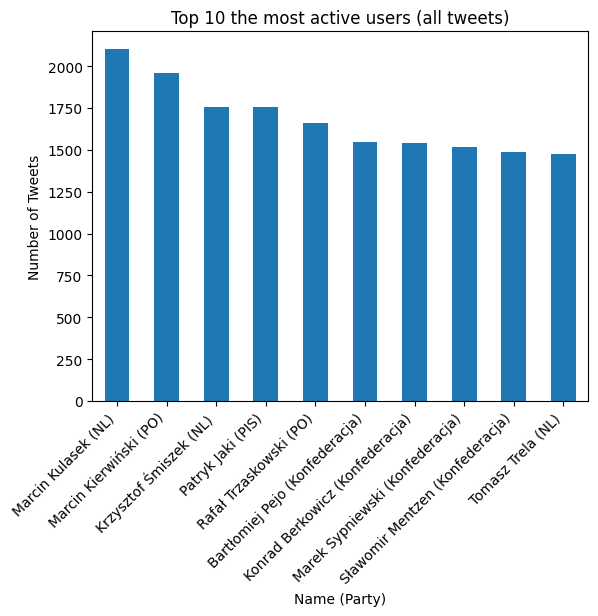

In [5]:
top_ten_users = df['name'].value_counts().head(10)
top_ten_users_df = top_ten_users.reset_index()
top_ten_users_df.columns = ['name', 'count']

top_ten_users_with_party = top_ten_users_df.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

top_ten_users_with_party.plot(kind='bar', x='name', y='count', legend=False)
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Top 10 the most active users (all tweets)')
labels = top_ten_users_with_party.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The three most active users are Marcin Kulasek (NL), Marcin Kierwiński (PO), and Krzysztof Śmieszek (NL). Each of them published around 2000 tweets in one year, averaging more than 2.5 tweets per day.

#### 3.2.2 General (only original posts)

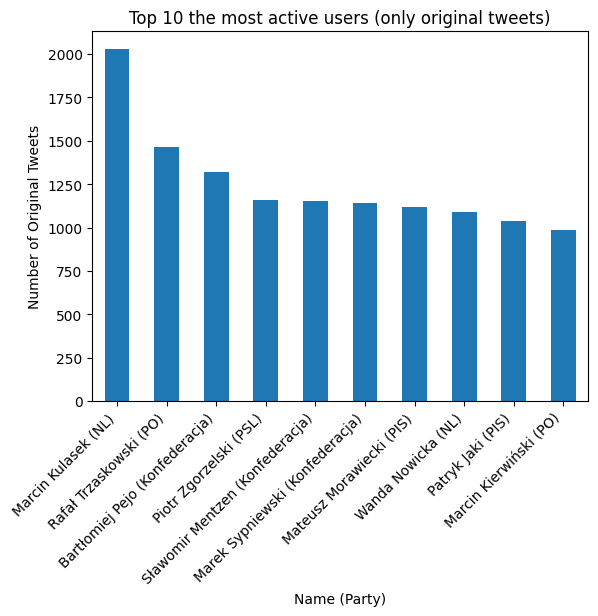

In [6]:
original_posts_df = df[df['category'] == 'Original']

top_ten_original_users = original_posts_df['name'].value_counts().head(10).reset_index()
top_ten_original_users.columns = ['name', 'count']

top_ten_original_users_with_party = top_ten_original_users.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

top_ten_original_users_with_party.plot(kind='bar', x='name', y='count', legend=False)
plt.xlabel('Name (Party)')
plt.ylabel('Number of Original Tweets')
plt.title('Top 10 the most active users (only original tweets)')
labels = top_ten_original_users_with_party.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The most active poster was Marcin Kulasek (NL), who wrote more than 2000 original tweets, averaging over two tweets per day.

#### 3.2.3 The most active users for party (all tweets)

          party               name  counts
0  Konfederacja    Bartłomiej Pejo    1546
1            NL     Marcin Kulasek    2102
2           PIS        Patryk Jaki    1755
3        PL2050         Paweł Śliz    1236
4            PO  Marcin Kierwiński    1957
5           PSL   Piotr Zgorzelski    1179


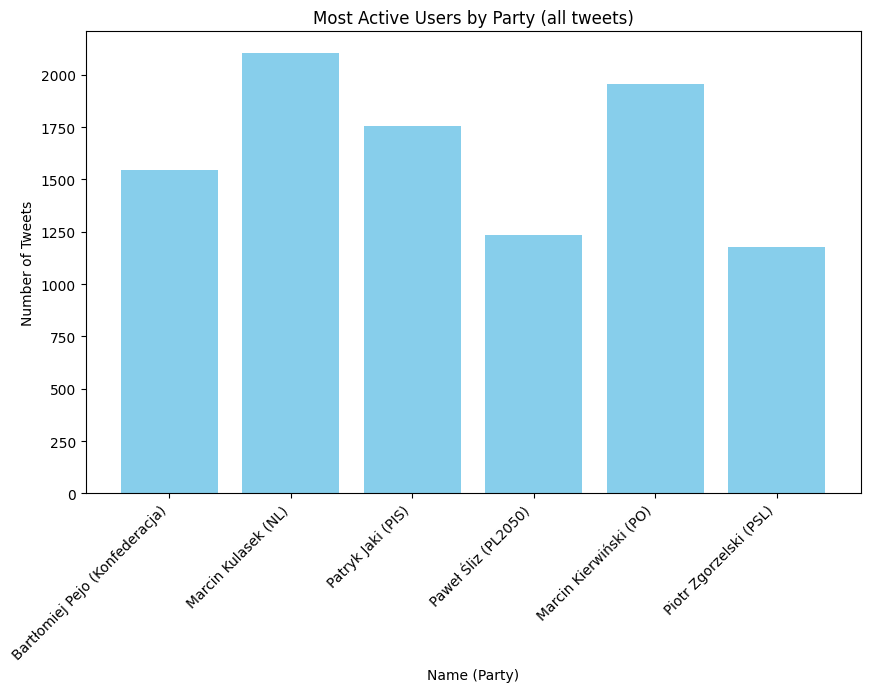

In [7]:
most_active_users = df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (all tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

The activity levels of the most active politicians from each party show considerable variation, ranging from approximately 1,200 to over 2,100 tweets per year.

#### 3.2.4 The most active users for party (only original tweets)

          party                name  counts
0  Konfederacja     Bartłomiej Pejo    1546
1            NL      Marcin Kulasek    2102
2           PIS  Mateusz Morawiecki    1257
3        PL2050     Szymon Hołownia     502
4            PO   Rafał Trzaskowski    1663
5           PSL    Piotr Zgorzelski    1179


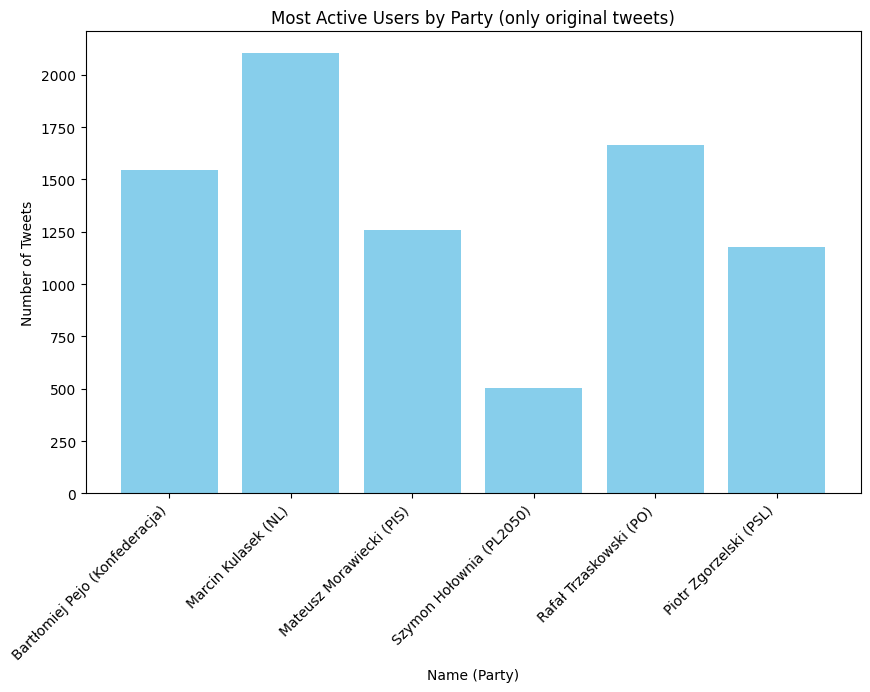

In [11]:
most_active_users = original_posts_df.groupby('party')['name'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'name']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'name'])
print(most_active_users_with_counts)
plt.figure(figsize=(10, 6))
plt.bar(most_active_users_with_counts['name'], most_active_users_with_counts['counts'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Number of Tweets')
plt.title('Most Active Users by Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
labels = most_active_users_with_counts.apply(lambda row: f"{row['name']} ({row['party']})", axis=1)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.show()

### 3.3 Number of tweets per Party 

### 3.3.1 All tweets

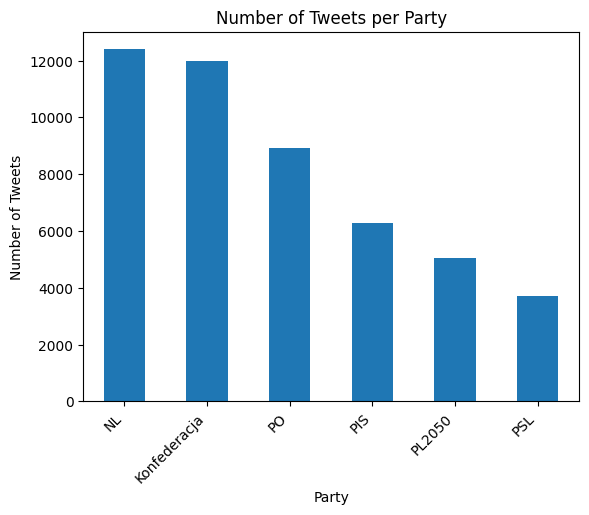

In [12]:
tweets_per_party = df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 3.3.2 Only original tweets

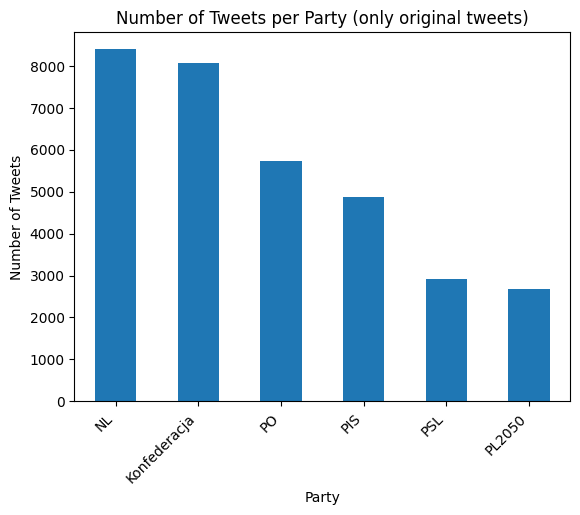

In [13]:
tweets_per_party = original_posts_df['party'].value_counts()
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party (only original tweets)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3.4 Publication time analysis 

#### 3.4.1 General

Spike around euroelection

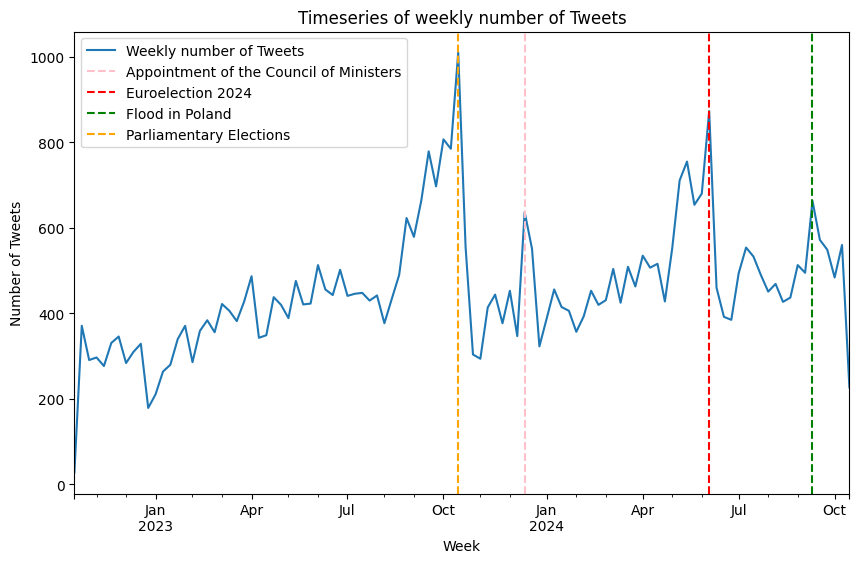

created_at
2023-10-15 00:00:00+00:00    1010
2024-06-09 00:00:00+00:00     873
2023-10-01 00:00:00+00:00     807
2023-10-08 00:00:00+00:00     785
2023-09-17 00:00:00+00:00     779
dtype: int64


In [14]:
df['created_at'] = pd.to_datetime(df['created_at'])
df_time = df.copy()
df_time.set_index('created_at', inplace=True)
weekly_tweets = df_time.resample('W').size()
weekly_tweets.plot(kind='line', figsize=(10, 6), label='Weekly number of Tweets')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Timeseries of weekly number of Tweets')
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
elections_date = pd.to_datetime('2023-10-15')
plt.axvline(x=elections_date, color='orange', linestyle='--', label='Parliamentary Elections')
plt.legend()
plt.show()
weekly_tweets_sorted = weekly_tweets.sort_values(ascending=False)
print(weekly_tweets_sorted.head(5))

We can observe that peeks overlap with important political events.

#### 3.4.2 By Party

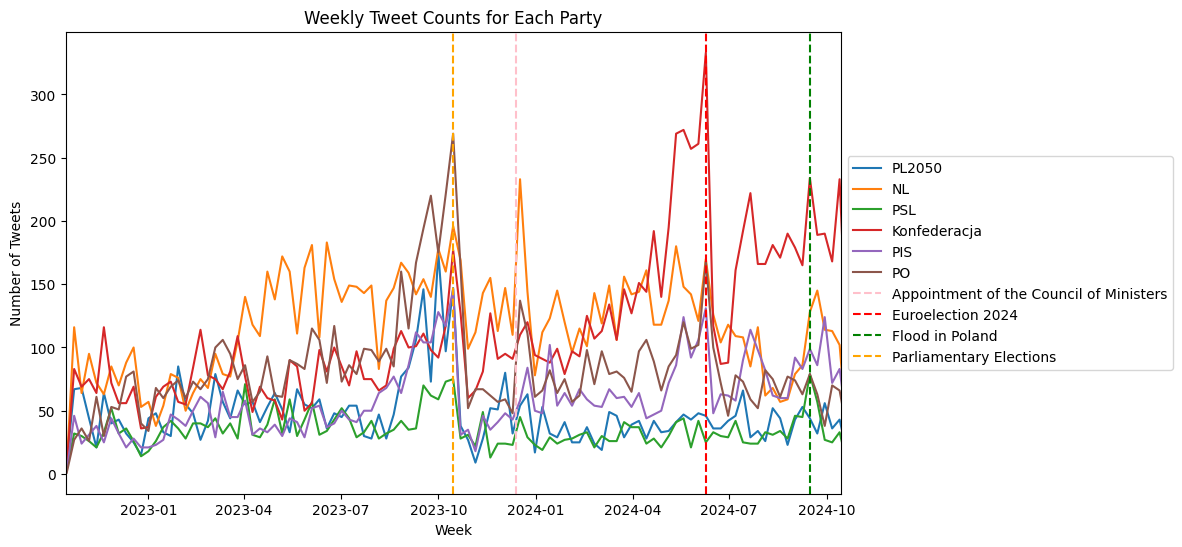

In [15]:
df_time_sorted = df_time.sort_index()
df_time_sorted['created_at'] = pd.to_datetime(df_time_sorted.index)
df_time_sorted.set_index('created_at', inplace=True)
parties = df_time_sorted['party'].unique()
plt.figure(figsize=(10, 6))
for party in parties:
    party_df = df_time_sorted[df_time_sorted['party'] == party]
    weekly_tweets = party_df.resample('W').size()
    plt.plot(weekly_tweets, label=party)
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts for Each Party')

plt.xlim(pd.to_datetime('2022-10-15'), pd.to_datetime('2024-10-14'))
council_date = pd.to_datetime('2023-12-13')
plt.axvline(x=council_date, color='pink', linestyle='--', label='Appointment of the Council of Ministers')
euroelection_date = pd.to_datetime('2024-06-09')
plt.axvline(x=euroelection_date, color='red', linestyle='--', label='Euroelection 2024')
flood_date = pd.to_datetime('2024-09-15')
plt.axvline(x=flood_date, color='green', linestyle='--', label='Flood in Poland')
elections_date = pd.to_datetime('2023-10-15')
plt.axvline(x=elections_date, color='orange', linestyle='--', label='Parliamentary Elections')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


We can observe that PO was the most active party after the parliamentary election and the appointment of the Council of Ministers. During the Euroelection, PIS and Konfederacja were more active. During the flood, there was a significant gap in activity between Konfederacja and PIS compared to other parties.

### 3.5 Average number of words in tweets

#### 3.5.1 By category

   category  word_count
0  Original   25.801483
1     Quote   16.471055
2     Reply   15.696201


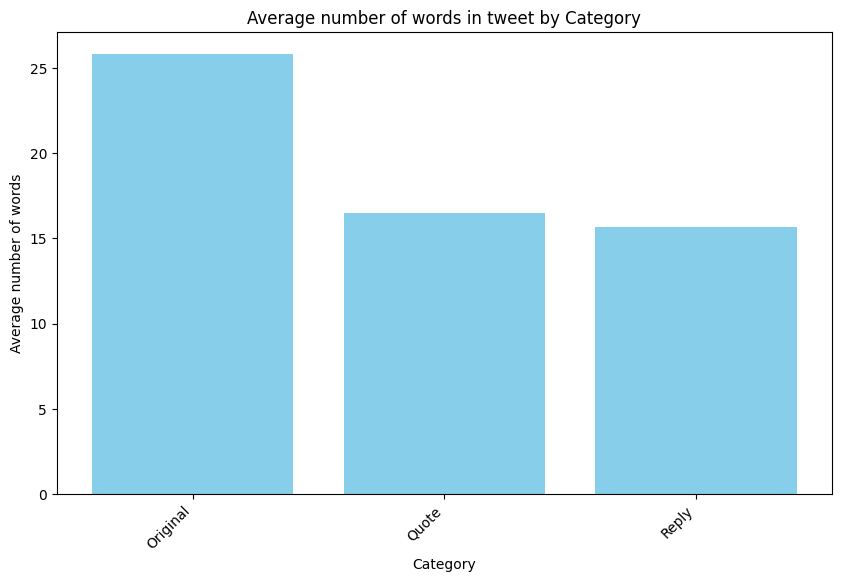

In [20]:
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))

user_word_count_summary = df.groupby(['party', 'username', 'category'])['word_count'].mean().reset_index()

category_word_count_summary = user_word_count_summary.groupby(['category'])['word_count'].mean().reset_index()
print(category_word_count_summary)

plt.figure(figsize=(10, 6))
plt.bar(category_word_count_summary['category'], category_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average number of words')
plt.title('Average number of words in tweet by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

As expected, original tweets are the longest type of posts on average.

#### 3.5.2 By party

          party  word_count
2           PIS   25.920739
5           PSL   21.044300
3        PL2050   20.279095
0  Konfederacja   19.426852
4            PO   17.433799
1            NL   15.689499


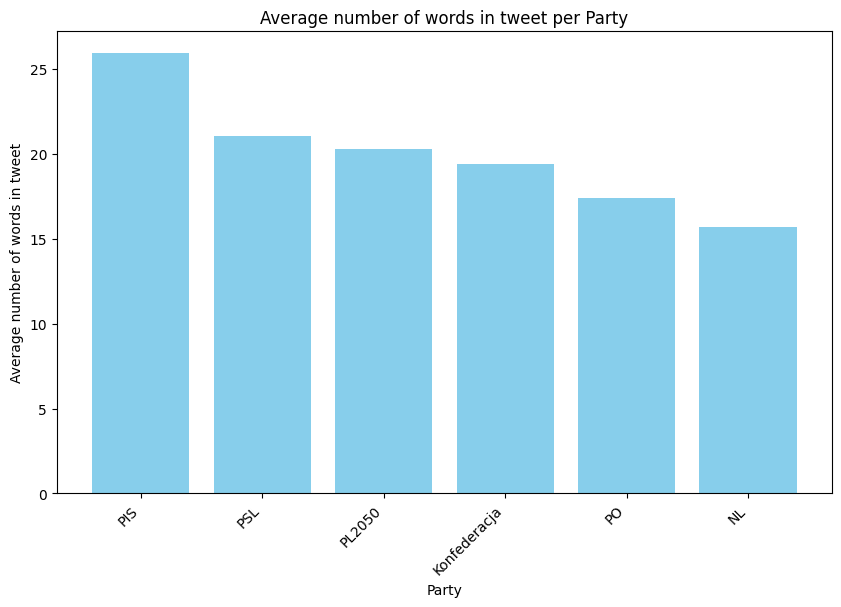

In [21]:
party_user_word_count_summary = user_word_count_summary.groupby('party')['word_count'].mean().reset_index()
party_user_word_count_summary = party_user_word_count_summary.sort_values(by='word_count', ascending=False)
print(party_user_word_count_summary)
plt.figure(figsize=(10, 6))
plt.bar(party_user_word_count_summary['party'], party_user_word_count_summary['word_count'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Average number of words in tweet')
plt.title('Average number of words in tweet per Party')
plt.xticks(rotation=45, ha='right')
plt.show()

We can observe that politicians from PIS tend to write the longest posts, while those from NL generally prefer shorter ones. However, it is worth noting that the difference in the average number of words is only 5, which is around 25% of the average post length.

#### 3.5.3 By user

           party                       name  word_count
30           PIS          Mariusz Błaszczak   34.095541
39        PL2050       Katarzyna Pelczyńska   33.583618
29           PIS           Henryk Kowalczyk   32.541045
31           PIS           Mariusz Kamiński   31.953846
6   Konfederacja               Michał Wawer   31.131994
52            PO                 Ewa Kopacz   31.041841
68           PSL  Władysław Kosiniak-Kamysz   30.916873
61           PSL               Adam Struzik   29.714286
27           PIS               Beata Szydło   28.841197
24            NL              Wanda Nowicka   28.609622


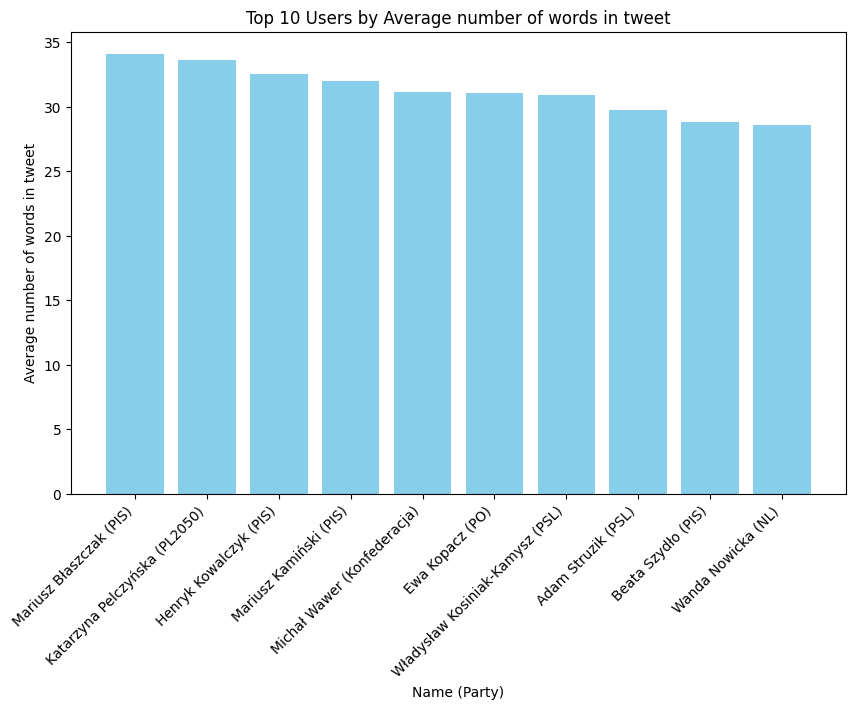

In [22]:
user_word_count_summary = df.groupby(['party', 'name'])['word_count'].mean().reset_index()

top_10_word_count = user_word_count_summary.sort_values(by='word_count', ascending=False).head(10)
print(top_10_word_count)

plt.figure(figsize=(10, 6))
plt.bar(top_10_word_count['name'] + ' (' + top_10_word_count['party'] + ')', top_10_word_count['word_count'], color='skyblue')
plt.xlabel('Name (Party)')
plt.ylabel('Average number of words in tweet')
plt.title('Top 10 Users by Average number of words in tweet')
plt.xticks(rotation=45, ha='right')
plt.show()


We can observe that the number of words used in tweets is not entirely dependent on the party affiliation. It appears to be more of a personal characteristic. However, it is interesting to note that none of the top 10 users by average number of words per tweet are from PIS.

#### 3.5.4 Histograms of Number of Words per party

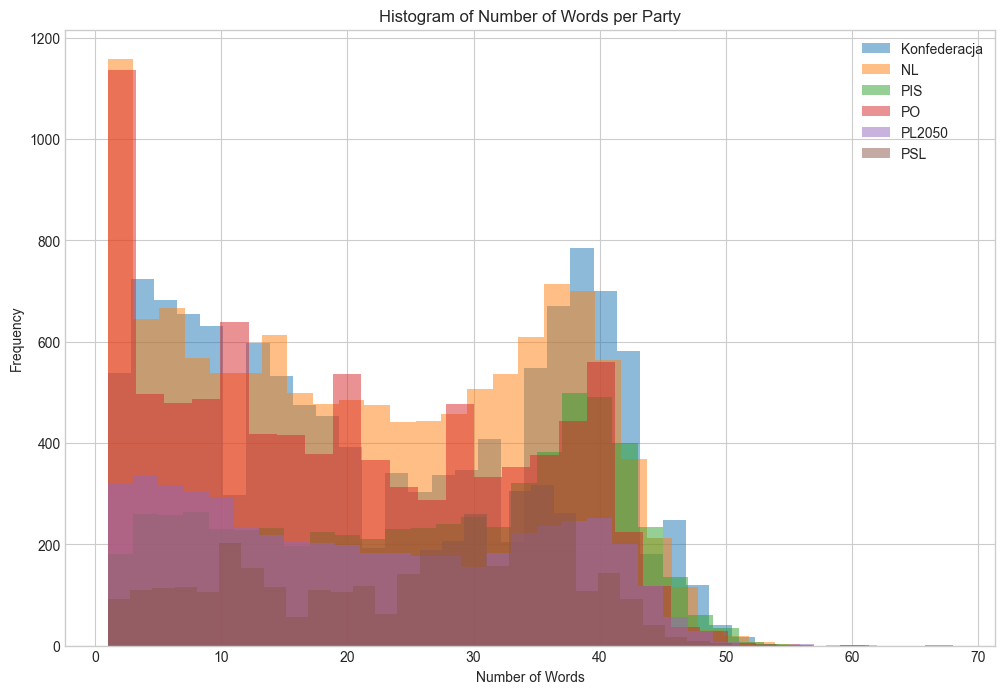

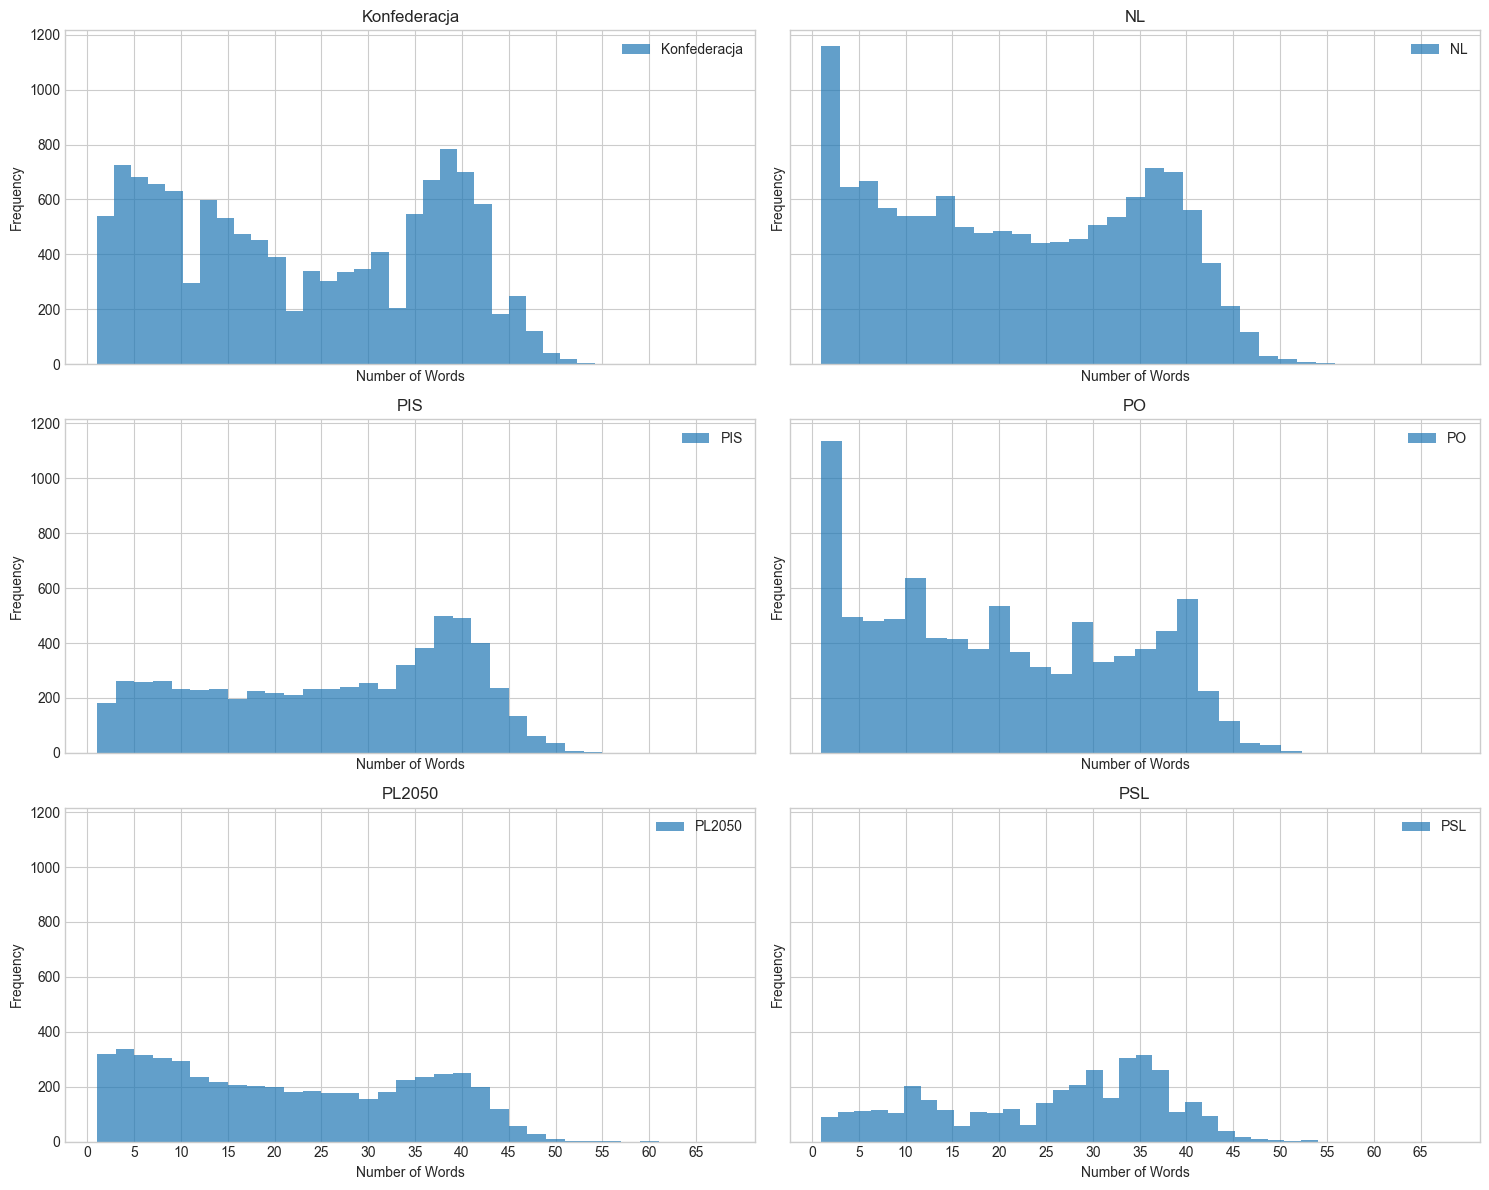

In [30]:
parties = df['party'].unique()
plt.figure(figsize=(12, 8))

for party in parties:
    plt.hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.5, label=party)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Party')
plt.legend()
plt.show() 
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, party in enumerate(parties):
    axes[i].hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.7, label=party)
    axes[i].set_title(f'{party}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_xticks(range(0, df['word_count'].max() + 1, 5))  # Set x-axis scale

plt.tight_layout()
plt.show()


We can observe that the most common tweet lengths are very short, up to 5 words, and around 10 words. Interestingly, there is also a notable peak at around 40 words. Each party shows a significant number of tweets with approximately 40 words.

### 3.5.5. Histograms of Number of Signs per Party

Initially, we observed that the word count in our dataset often clustered around 50 words per tweet. This led us to question how this pattern related to X's official character limits. The standard limit was increased from 140 to 280 characters in November 2017, which created a "soft ceiling" of approximately 50 words that defined standard communication for years.

Our hypothesis was that the introduction of long-form posts for X Premium subscribers in February 2023 fundamentally changed this dynamic. To investigate this, we split our dataset around this key date. We then analyzed the character count (sign_count) for each period to determine if the ~50 word pattern was a true boundary that was later removed, or simply a common communication style that politicians now have the option to bypass.

--- Data Split ---
Found 4600 posts Before February 2023.
Found 43731 posts On or After February 2023.

RUNNING ANALYSIS FOR: BEFORE FEBRUARY 2023



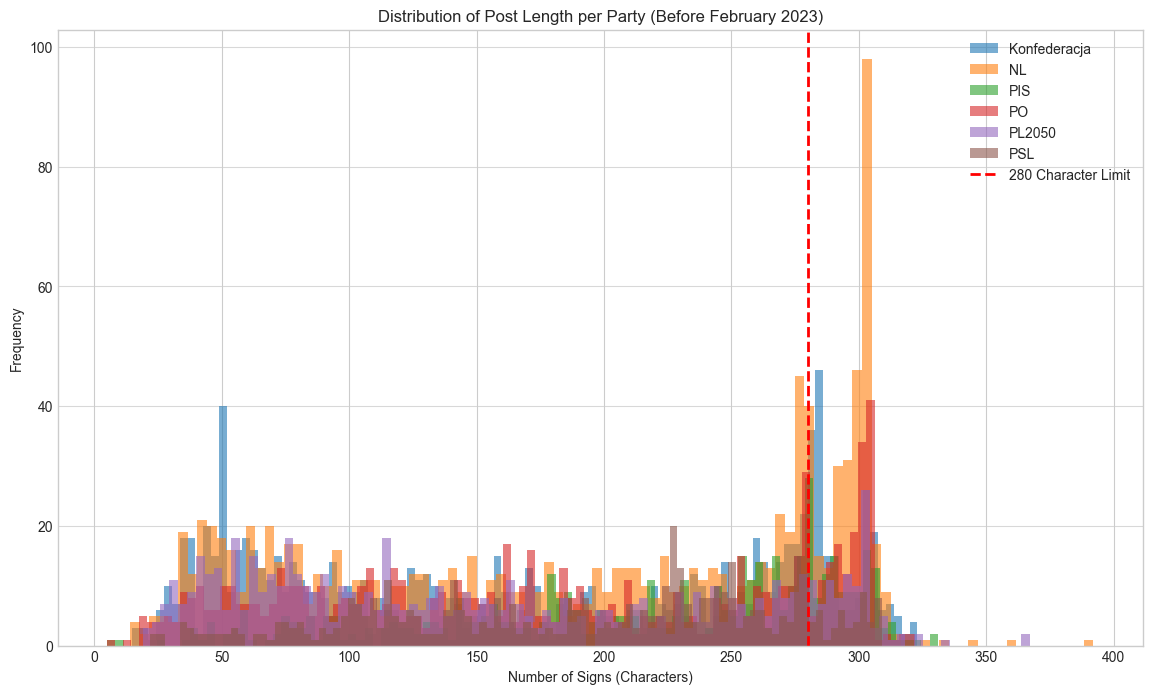


--- Summary Table: Long Post Usage by Party - Before February 2023 ---


,total_politicians,politicians_with_long_posts,total_posts,total_long_posts,%_politicians_using_long_posts,%_of_all_party_posts_are_long
party,,,,,,
Konfederacja,8,8,1010,189,100.00,18.71
NL,11,10,1135,283,90.91,24.93
PIS,8,8,486,110,100.00,22.63
PL2050,11,11,682,95,100.00,13.93
PO,9,8,810,161,88.89,19.88
PSL,7,6,477,48,85.71,10.06


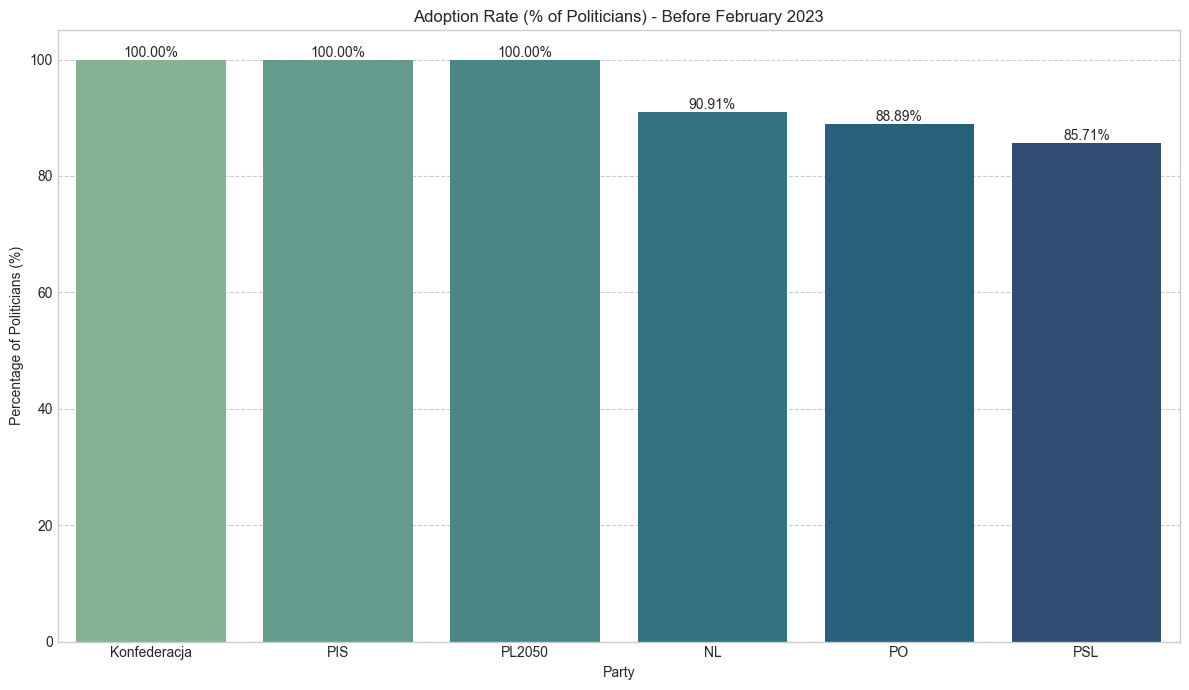

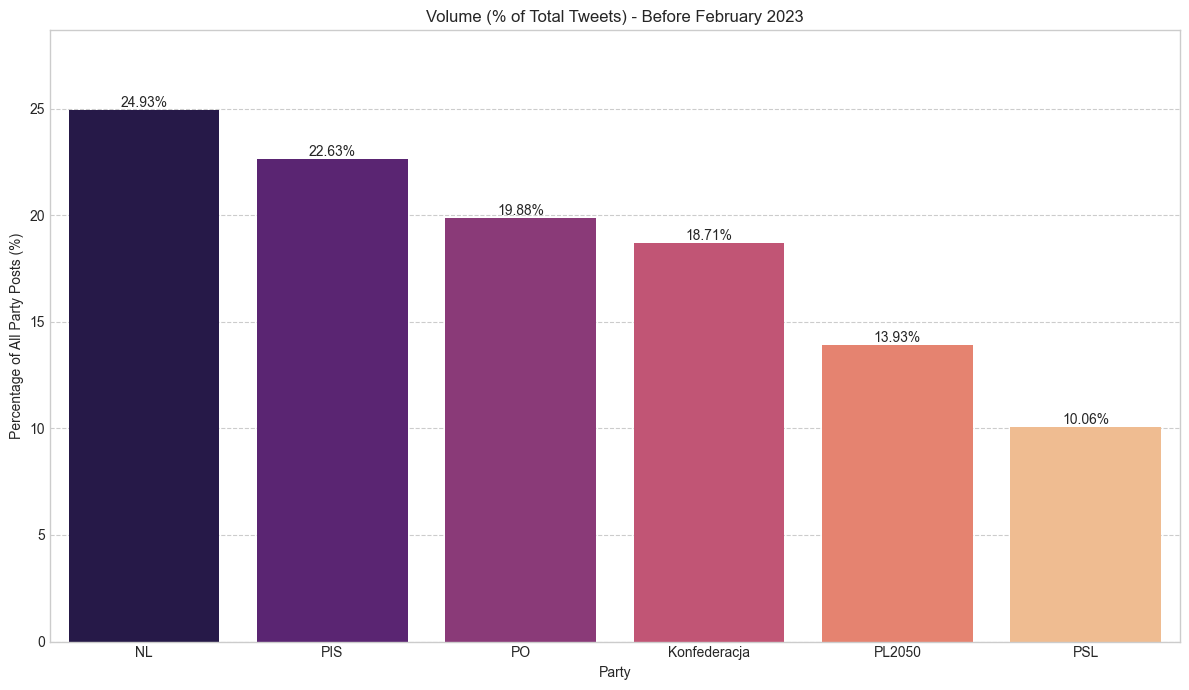


RUNNING ANALYSIS FOR: ON OR AFTER FEBRUARY 2023



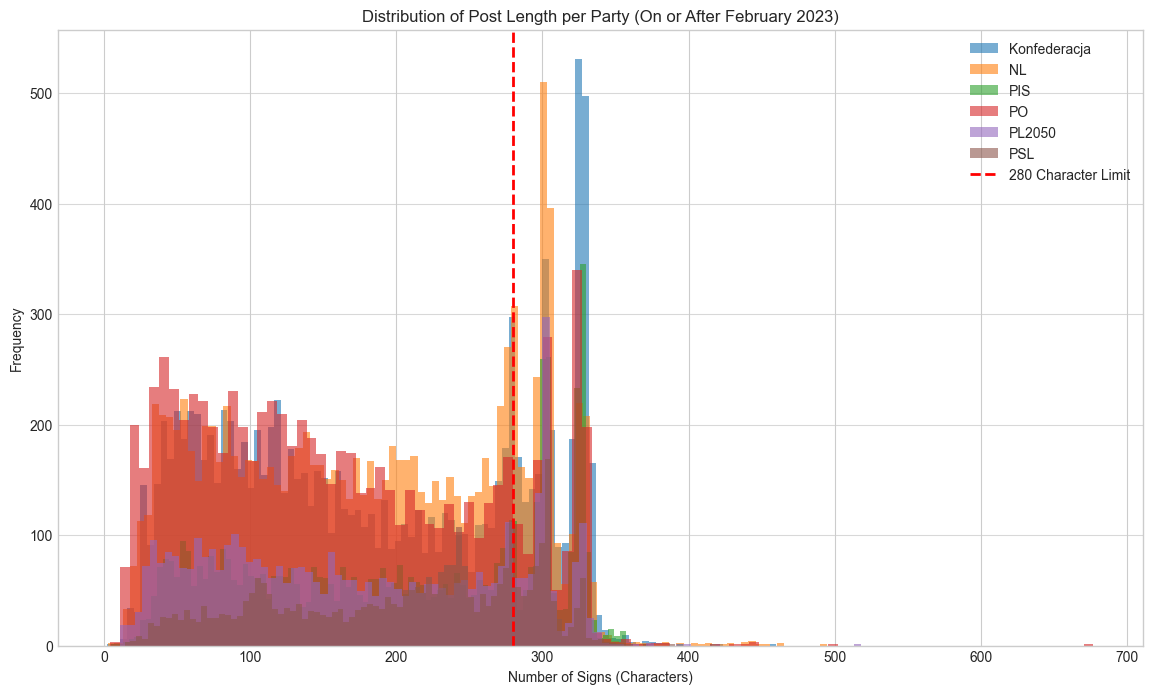


--- Summary Table: Long Post Usage by Party - On or After February 2023 ---


,total_politicians,politicians_with_long_posts,total_posts,total_long_posts,%_politicians_using_long_posts,%_of_all_party_posts_are_long
party,,,,,,
Konfederacja,11,10,10993,2826,90.91,25.71
NL,15,15,11257,2383,100.00,21.17
PIS,9,9,5780,1762,100.00,30.48
PL2050,12,12,4374,915,100.00,20.92
PO,13,13,8096,1317,100.00,16.27
PSL,9,9,3231,717,100.00,22.19


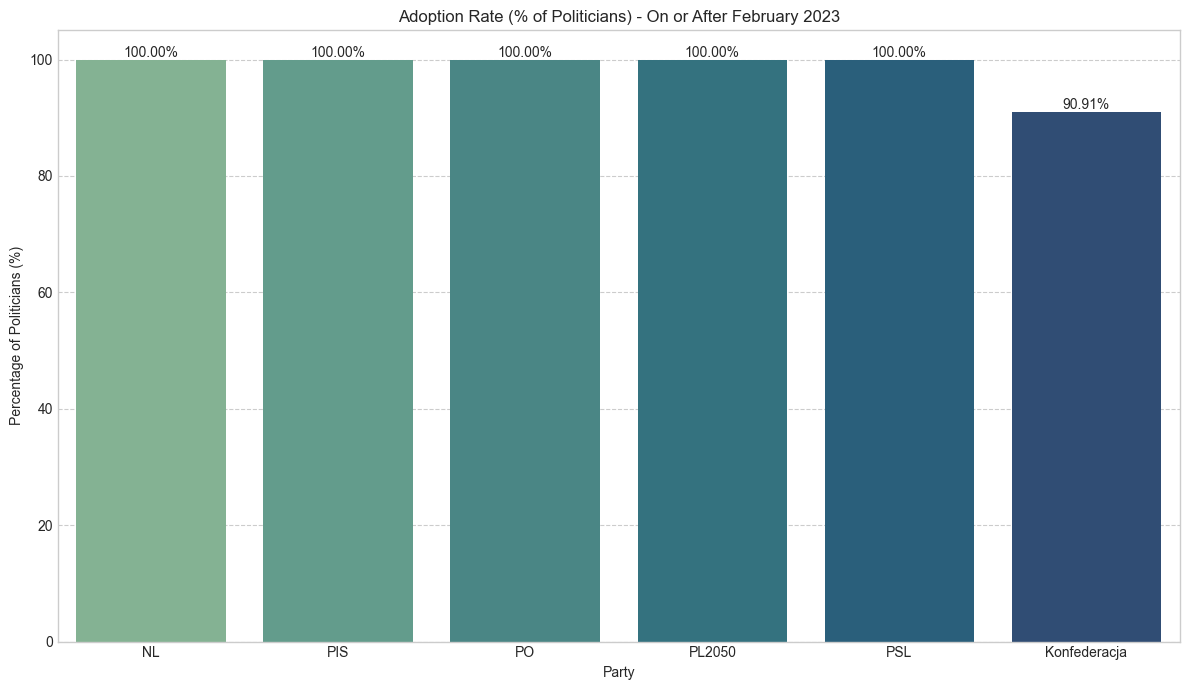

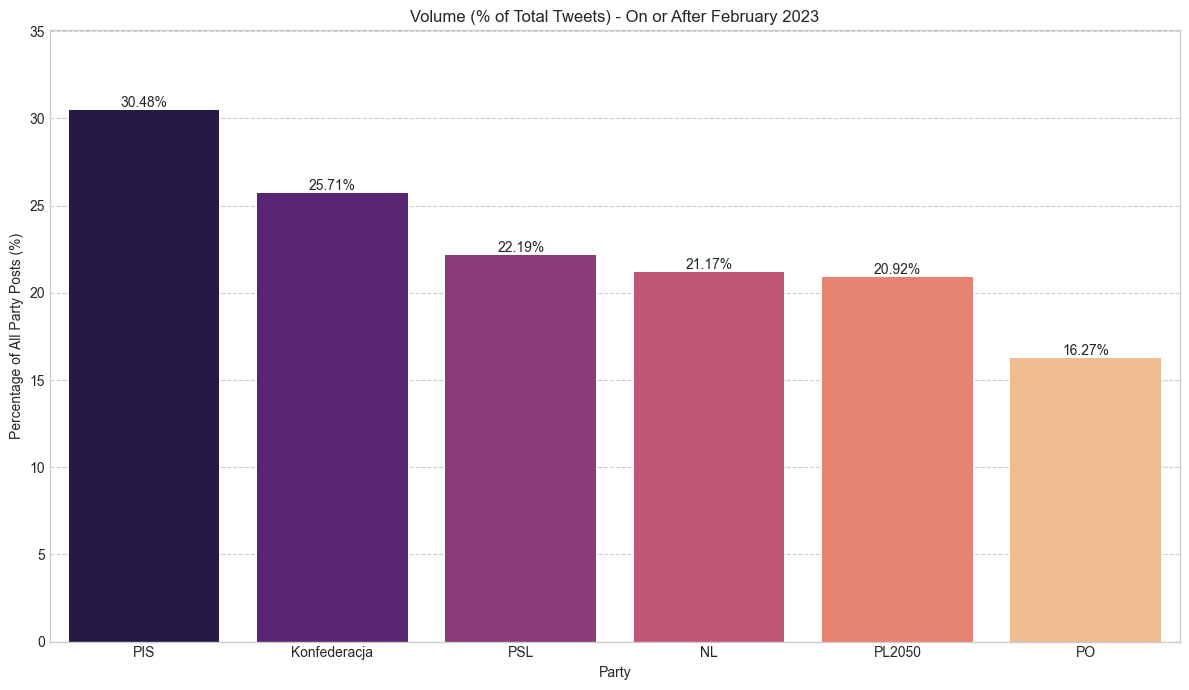


COMPARISON OF LONG-FORM POST USAGE: BEFORE VS. AFTER FEBRUARY 2023



,Adoption Rate (%) (Before),Volume (%) (Before),Adoption Rate (%) (After),Volume (%) (After)
party,,,,
Konfederacja,100.00,18.71,90.91,25.71
NL,90.91,24.93,100.00,21.17
PIS,100.00,22.63,100.00,30.48
PL2050,100.00,13.93,100.00,20.92
PO,88.89,19.88,100.00,16.27
PSL,85.71,10.06,100.00,22.19


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

df['created_at'] = pd.to_datetime(df['created_at'], utc=True)
df['sign_count'] = df['text'].str.len()
df['is_long_post'] = df['sign_count'] > 280
cutoff_date = pd.to_datetime('2023-02-01', utc=True)
df_before = df[df['created_at'] < cutoff_date].copy()
df_after = df[df['created_at'] >= cutoff_date].copy()

print(f"--- Data Split ---")
print(f"Found {len(df_before)} posts Before February 2023.")
print(f"Found {len(df_after)} posts On or After February 2023.")

def run_analysis(dataframe, period_name):
    print("\n" + "="*80)
    print(f"RUNNING ANALYSIS FOR: {period_name.upper()}")
    print("="*80 + "\n")

    if dataframe.empty:
        print(f"No data available for the period '{period_name}'. Skipping analysis.")
        return None

    parties = dataframe['party'].unique()
    plt.figure(figsize=(14, 8))
    for party in parties:
        subset = dataframe[(dataframe['party'] == party) & (dataframe['sign_count'] < 800)]
        plt.hist(subset['sign_count'], bins=100, alpha=0.6, label=party)
    plt.axvline(280, color='r', linestyle='--', linewidth=2, label='280 Character Limit')
    plt.xlabel('Number of Signs (Characters)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Post Length per Party ({period_name})')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    party_post_counts = dataframe.groupby('party').agg(total_posts=('id', 'count'), total_long_posts=('is_long_post', 'sum'))
    users_exceeding_per_party = dataframe[dataframe['is_long_post']].groupby('party')['name'].nunique().rename('politicians_with_long_posts')
    total_users_per_party = dataframe.groupby('party')['name'].nunique().rename('total_politicians')
    party_summary = pd.concat([total_users_per_party, users_exceeding_per_party, party_post_counts], axis=1).fillna(0).astype(int)
    
    if 'total_politicians' in party_summary.columns and not party_summary['total_politicians'].eq(0).all():
         party_summary['%_politicians_using_long_posts'] = ((party_summary['politicians_with_long_posts'] / party_summary['total_politicians']) * 100).round(2)
    else:
         party_summary['%_politicians_using_long_posts'] = 0

    if 'total_posts' in party_summary.columns and not party_summary['total_posts'].eq(0).all():
        party_summary['%_of_all_party_posts_are_long'] = ((party_summary['total_long_posts'] / party_summary['total_posts']) * 100).round(2)
    else:
        party_summary['%_of_all_party_posts_are_long'] = 0

    print(f"\n--- Summary Table: Long Post Usage by Party - {period_name} ---")
    display(party_summary)
    
    if not party_summary.empty:
        party_summary_sorted_adoption = party_summary.sort_values('%_politicians_using_long_posts', ascending=False)
        plt.figure(figsize=(12, 7))
        ax_politicians = sns.barplot(x=party_summary_sorted_adoption.index, y='%_politicians_using_long_posts', data=party_summary_sorted_adoption, palette='crest', hue=party_summary_sorted_adoption.index, legend=False)
        ax_politicians.set_title(f'Adoption Rate (% of Politicians) - {period_name}')
        ax_politicians.set_xlabel('Party')
        ax_politicians.set_ylabel('Percentage of Politicians (%)')
        ax_politicians.set_ylim(0, 105)
        for bar in ax_politicians.patches:
            height = bar.get_height()
            ax_politicians.text(x=bar.get_x() + bar.get_width() / 2, y=height, s=f'{height:.2f}%', ha='center', va='bottom')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

        party_summary_sorted_volume = party_summary.sort_values('%_of_all_party_posts_are_long', ascending=False)
        plt.figure(figsize=(12, 7))
        ax_volume = sns.barplot(x=party_summary_sorted_volume.index, y='%_of_all_party_posts_are_long', data=party_summary_sorted_volume, palette='magma', hue=party_summary_sorted_volume.index, legend=False)
        ax_volume.set_title(f'Volume (% of Total Tweets) - {period_name}')
        ax_volume.set_xlabel('Party')
        ax_volume.set_ylabel('Percentage of All Party Posts (%)')
        if party_summary_sorted_volume['%_of_all_party_posts_are_long'].max() > 0:
            ax_volume.set_ylim(0, party_summary_sorted_volume['%_of_all_party_posts_are_long'].max() * 1.15)
        for bar in ax_volume.patches:
            height = bar.get_height()
            ax_volume.text(x=bar.get_x() + bar.get_width() / 2, y=height, s=f'{height:.2f}%', ha='center', va='bottom')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.show()

    return party_summary

summary_before = run_analysis(df_before, "Before February 2023")
summary_after = run_analysis(df_after, "On or After February 2023")

if summary_before is not None and summary_after is not None:
    cols_to_compare = ['%_politicians_using_long_posts', '%_of_all_party_posts_are_long']
    
    before_renamed = summary_before[cols_to_compare].rename(columns={
        '%_politicians_using_long_posts': 'Adoption Rate (%) (Before)',
        '%_of_all_party_posts_are_long': 'Volume (%) (Before)'
    })
    
    after_renamed = summary_after[cols_to_compare].rename(columns={
        '%_politicians_using_long_posts': 'Adoption Rate (%) (After)',
        '%_of_all_party_posts_are_long': 'Volume (%) (After)'
    })
    
    comparison_table = before_renamed.join(after_renamed, how='outer').fillna(0)
    
    print("\n" + "="*80)
    print("COMPARISON OF LONG-FORM POST USAGE: BEFORE VS. AFTER FEBRUARY 2023")
    print("="*80 + "\n")
    display(comparison_table)

In February 2023, X introduced long-form posts for Premium subscribers, allowing them to write posts longer than the previous 280-character limit. T

Before this date, communication was largely limited by the 280-character limit. However, our findings reveal that some posts already exceeded this limit. The easiest explanation is that select politicians were part of an early access or beta testing group, allowing them to use the feature before it was widely available. This shows that the transition was not instantaneous but began with a phase of exclusive access.



### 3.6 Average number of emojis in tweets

#### 3.6.1 By party

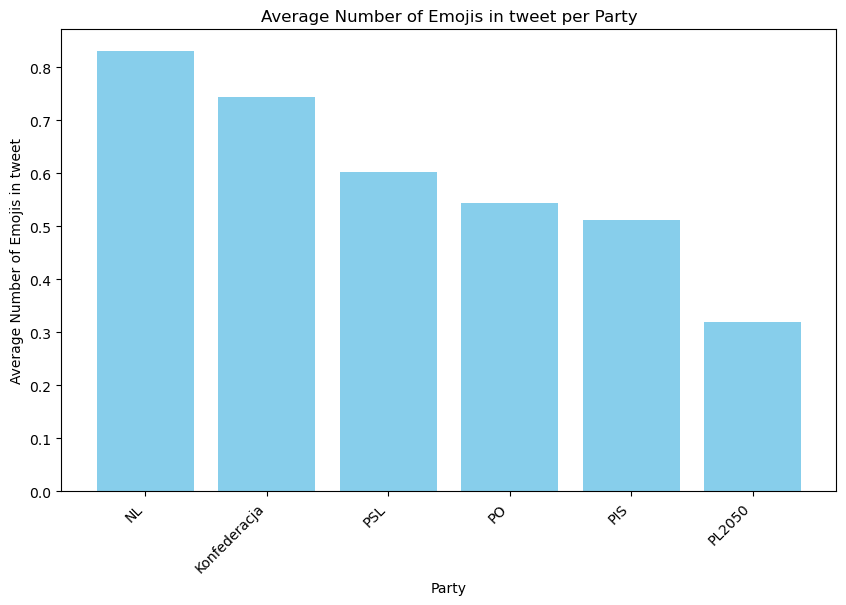

          party  average_emoji_per_post
1            NL                0.829729
0  Konfederacja                0.744231
5           PSL                0.602211
4            PO                0.543229
2           PIS                0.511012
3        PL2050                0.319027


In [17]:
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)
df['emoji_count'] = df['text_clean'].apply(count_emojis)
emoji_counts_per_party = df.groupby('party')['emoji_count'].sum().reset_index()
emoji_counts_per_party.columns = ['party', 'total_emoji_count']
average_emoji_per_post_per_party = df.groupby('party')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_party.columns = ['party', 'average_emoji_per_post']
average_emoji_per_post_per_party = average_emoji_per_post_per_party.sort_values(by='average_emoji_per_post', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(average_emoji_per_post_per_party['party'], average_emoji_per_post_per_party['average_emoji_per_post'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Average Number of Emojis in tweet')
plt.title('Average Number of Emojis in tweet per Party')
plt.xticks(rotation=45, ha='right')
plt.show()
print(average_emoji_per_post_per_party)

Politicians in Nowa Lewica use, on average almost one emoji per tweet, while those in PL2050 use only 0.3 emojis per tweet on average.

#### 3.6.2 By user

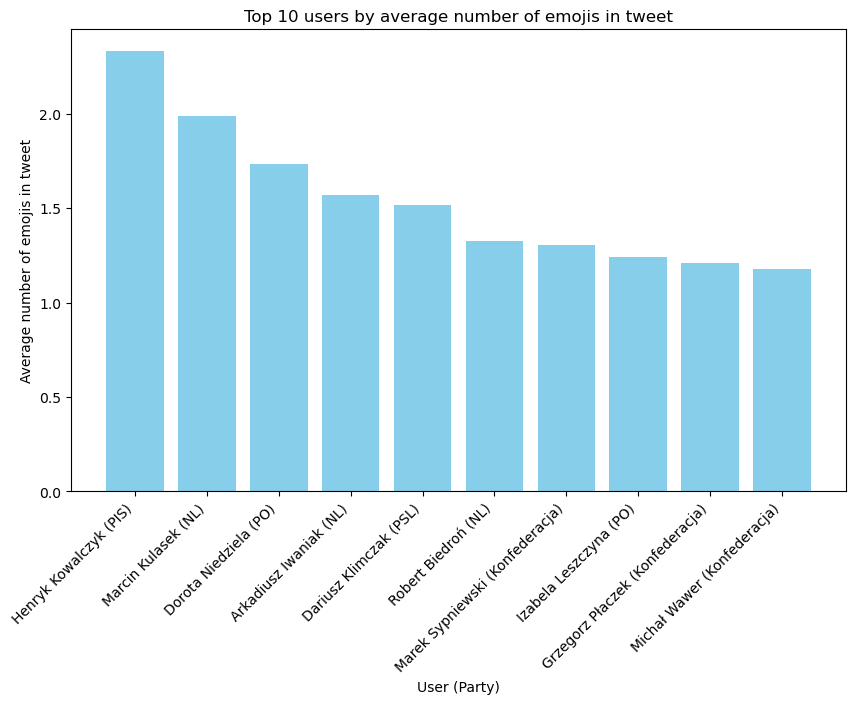

                name  average_emoji_per_post         party
0   Henryk Kowalczyk                2.328358           PIS
1     Marcin Kulasek                1.988107            NL
2   Dorota Niedziela                1.731947            PO
3  Arkadiusz Iwaniak                1.566667            NL
4   Dariusz Klimczak                1.516820           PSL
5     Robert Biedroń                1.326531            NL
6   Marek Sypniewski                1.306579  Konfederacja
7  Izabela Leszczyna                1.241901            PO
8   Grzegorz Płaczek                1.209886  Konfederacja
9       Michał Wawer                1.177905  Konfederacja


In [18]:
emoji_counts_per_user = df.groupby('name')['emoji_count'].sum().reset_index()
emoji_counts_per_user.columns = ['name', 'total_emoji_count']
average_emoji_per_post_per_user = df.groupby('name')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_user.columns = ['name', 'average_emoji_per_post']
average_emoji_per_post_per_user = average_emoji_per_post_per_user.sort_values(by='average_emoji_per_post', ascending=False)

top_10_emoji_users = average_emoji_per_post_per_user.head(10)
top_10_emoji_users = top_10_emoji_users.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

plt.figure(figsize=(10, 6))
plt.bar(top_10_emoji_users['name'] + ' (' + top_10_emoji_users['party'] + ')', top_10_emoji_users['average_emoji_per_post'], color='skyblue')
plt.xlabel('User (Party)')
plt.ylabel('Average number of emojis in tweet')
plt.title('Top 10 users by average number of emojis in tweet')
plt.xticks(rotation=45, ha='right')
plt.show()

print(top_10_emoji_users)

We can observe that some politicians use more than 2 emojis per tweet.

#### 3.7 Public metrics

#### 3.7.1 By party

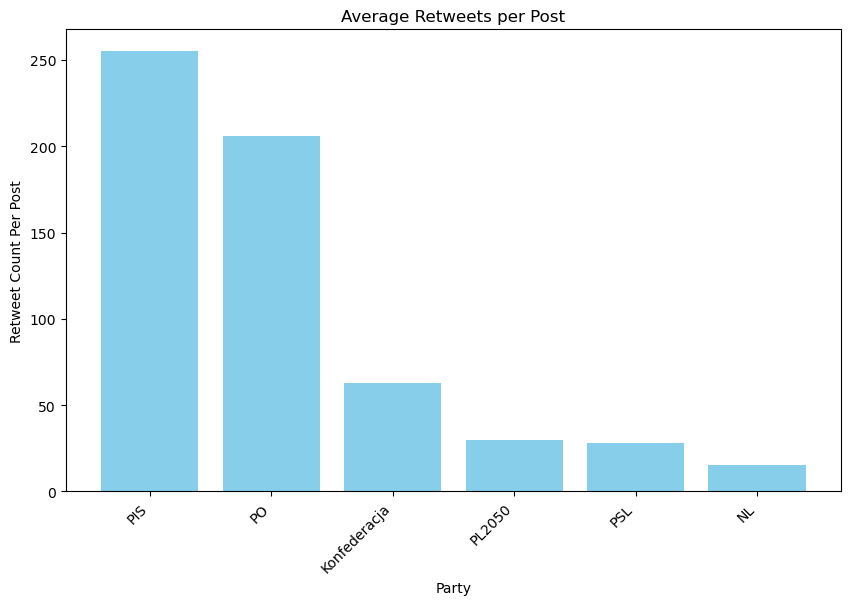

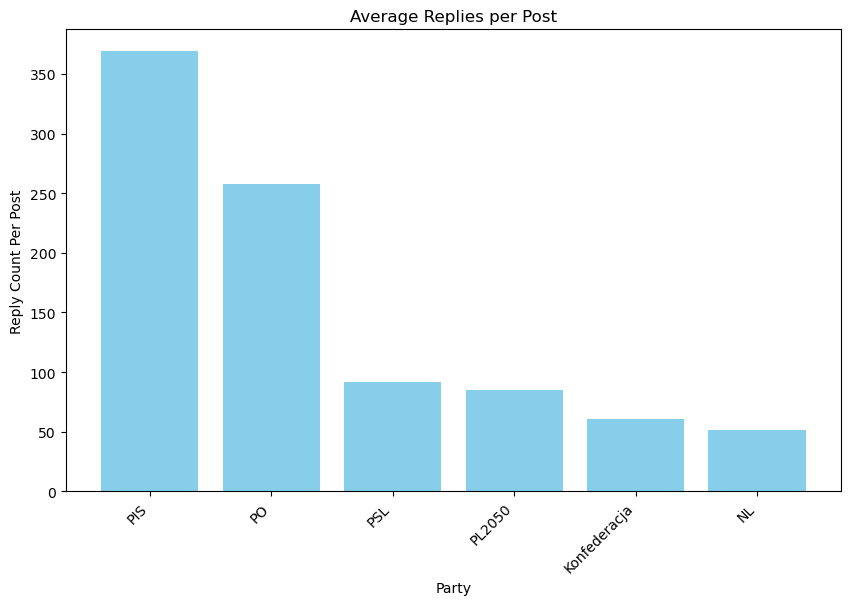

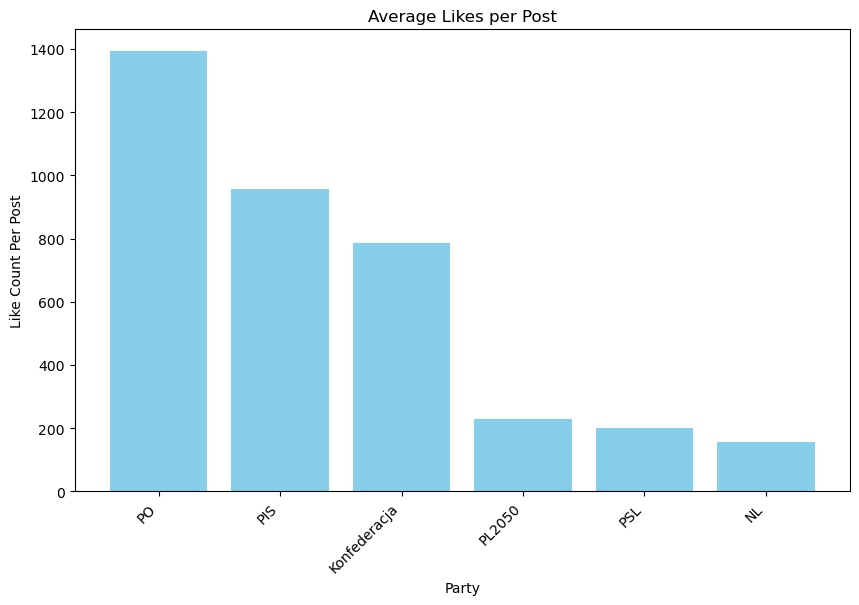

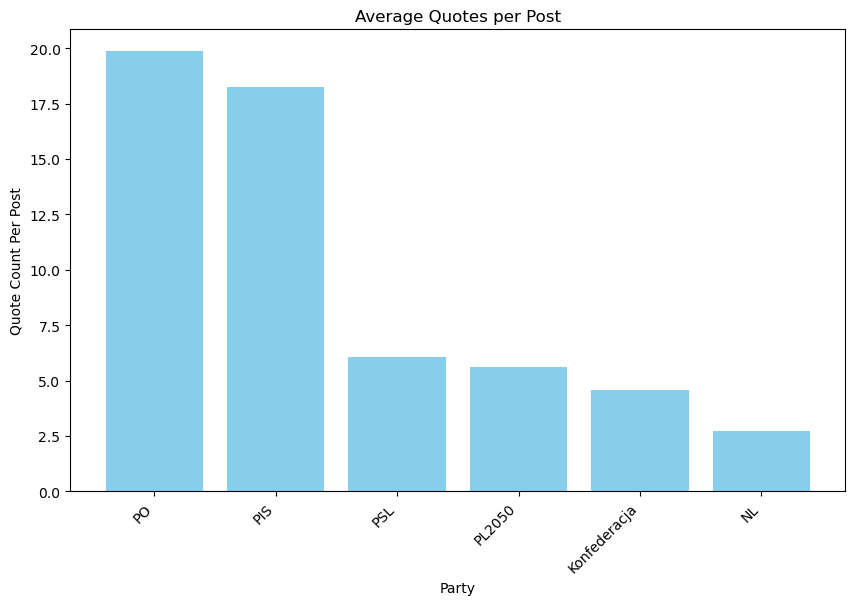

In [19]:
public_metrics_summary = df.groupby('party')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

total_posts_per_party = df['party'].value_counts().reset_index()
total_posts_per_party.columns = ['party', 'total_posts']

public_metrics_summary = public_metrics_summary.merge(total_posts_per_party, on='party')

public_metrics_summary['retweet_count_per_post'] = public_metrics_summary['retweet_count'] / public_metrics_summary['total_posts']
public_metrics_summary['reply_count_per_post'] = public_metrics_summary['reply_count'] / public_metrics_summary['total_posts']
public_metrics_summary['like_count_per_post'] = public_metrics_summary['like_count'] / public_metrics_summary['total_posts']
public_metrics_summary['quote_count_per_post'] = public_metrics_summary['quote_count'] / public_metrics_summary['total_posts']
metrics = ['retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']
titles = ['Average Retweets per Post', 'Average Replies per Post', 'Average Likes per Post', 'Average Quotes per Post']

for i, metric in enumerate(metrics):
    sorted_df = public_metrics_summary.sort_values(by=metric, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['party'], sorted_df[metric], color='skyblue')
    plt.xlabel('Party')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(titles[i])
    plt.xticks(rotation=45, ha='right')
    plt.show()


As observed, PO and PIS consistently attract the highest engagement, leading in average values across all public metrics. These two parties alternate in the top positions depending on the metric, while other parties show significantly lower levels of engagement.

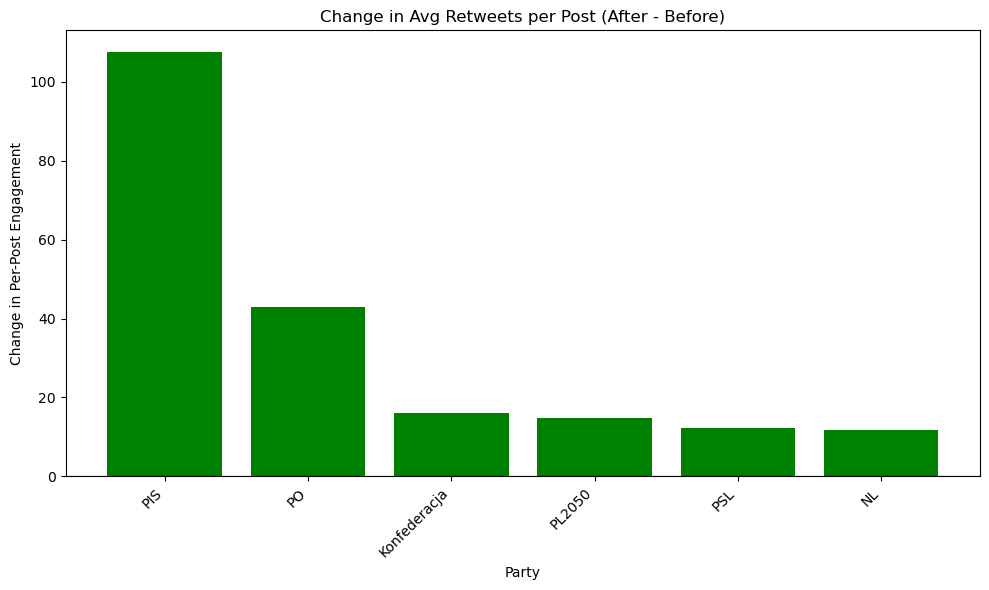

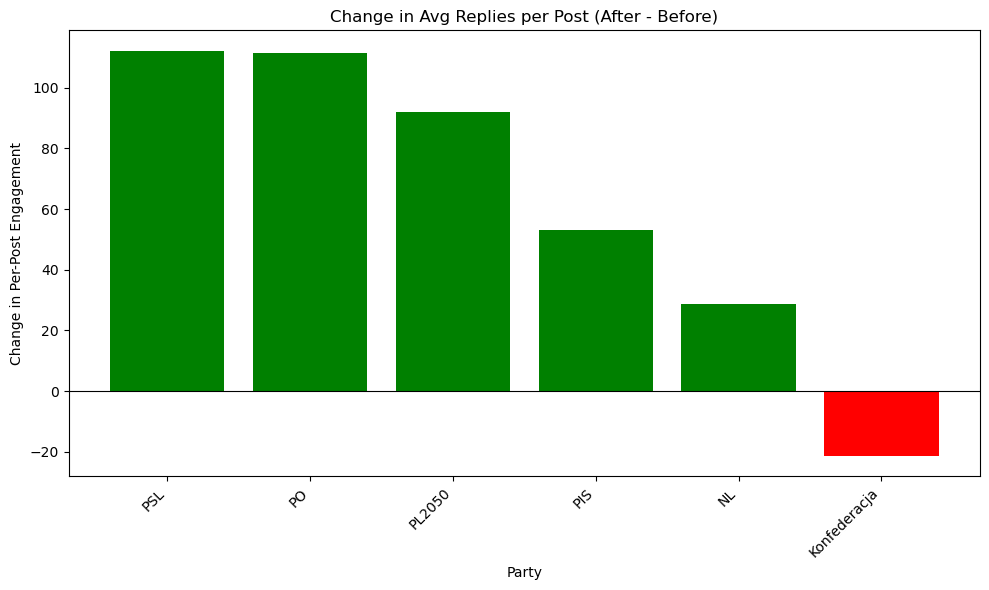

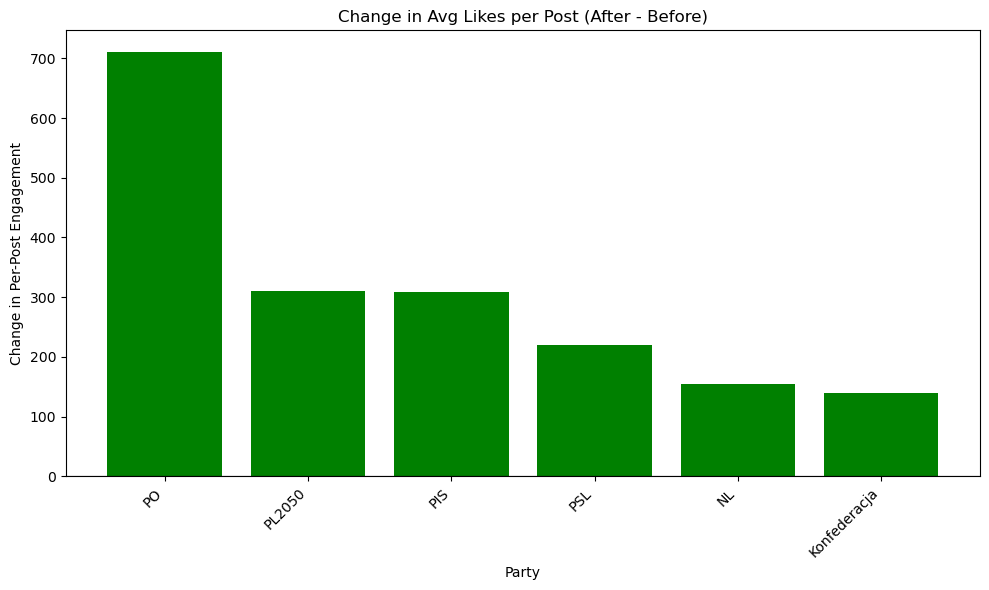

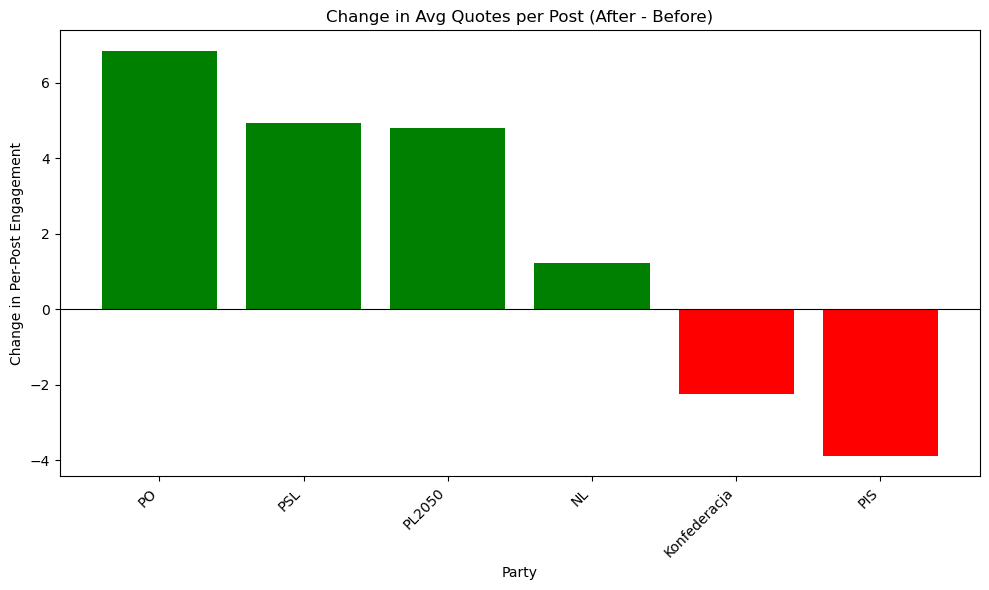

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is properly parsed
df['created_at'] = pd.to_datetime(df['created_at'])

# Split the data around 13 October 2023
cutoff = pd.Timestamp('2023-10-13T00:00:00+00:00')
df_before = df[df['created_at'] < cutoff]
df_after = df[df['created_at'] >= cutoff]

# Function to compute per-post metrics
def compute_summary(data):
    summary = data.groupby('party')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()
    total_posts = data['party'].value_counts().reset_index()
    total_posts.columns = ['party', 'total_posts']
    summary = summary.merge(total_posts, on='party')
    
    for metric in ['retweet_count', 'reply_count', 'like_count', 'quote_count']:
        summary[f'{metric}_per_post'] = summary[metric] / summary['total_posts']
    
    return summary[['party', 
                    'retweet_count_per_post', 
                    'reply_count_per_post', 
                    'like_count_per_post', 
                    'quote_count_per_post']]

# Compute summaries and deltas
summary_before = compute_summary(df_before)
summary_after = compute_summary(df_after)

comparison = summary_before.merge(summary_after, on='party', suffixes=('_before', '_after'))

for metric in ['retweet_count', 'reply_count', 'like_count', 'quote_count']:
    comparison[f'{metric}_delta'] = comparison[f'{metric}_per_post_after'] - comparison[f'{metric}_per_post_before']

# Plot changes
metrics = ['retweet_count', 'reply_count', 'like_count', 'quote_count']
titles = ['Change in Avg Retweets per Post', 
          'Change in Avg Replies per Post', 
          'Change in Avg Likes per Post', 
          'Change in Avg Quotes per Post']

for i, metric in enumerate(metrics):
    sorted_df = comparison.sort_values(by=f'{metric}_delta', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['party'], sorted_df[f'{metric}_delta'], 
            color=['green' if x > 0 else 'red' for x in sorted_df[f'{metric}_delta']])
    
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(titles[i] + ' (After - Before)')
    plt.xlabel('Party')
    plt.ylabel('Change in Per-Post Engagement')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### 3.7.2 By users

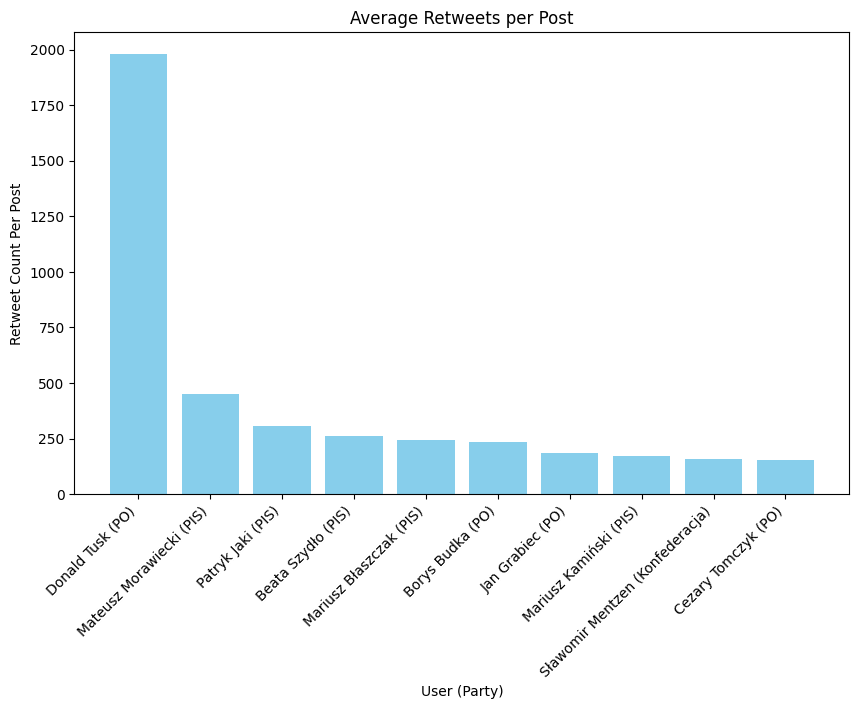

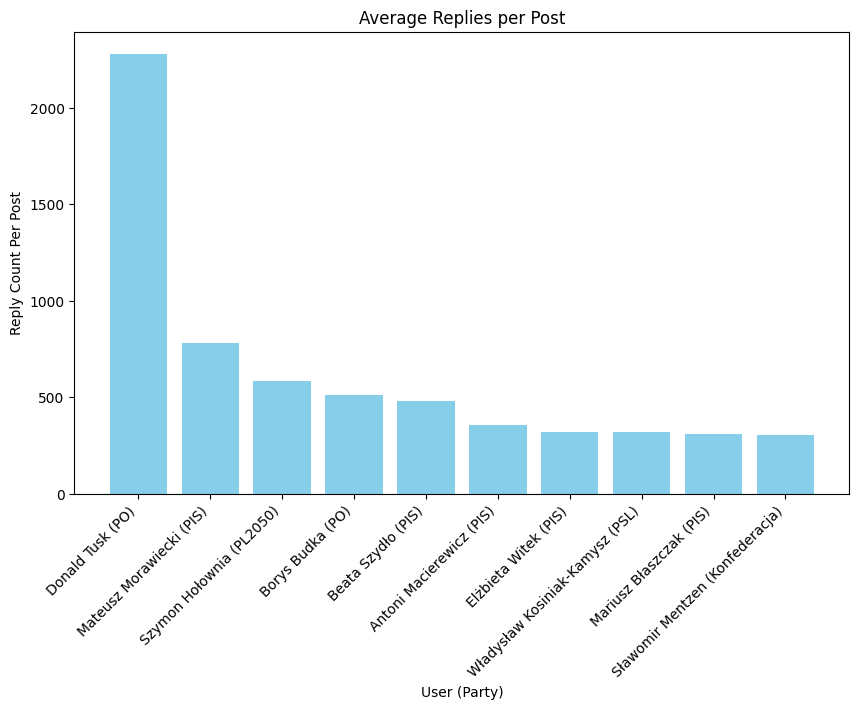

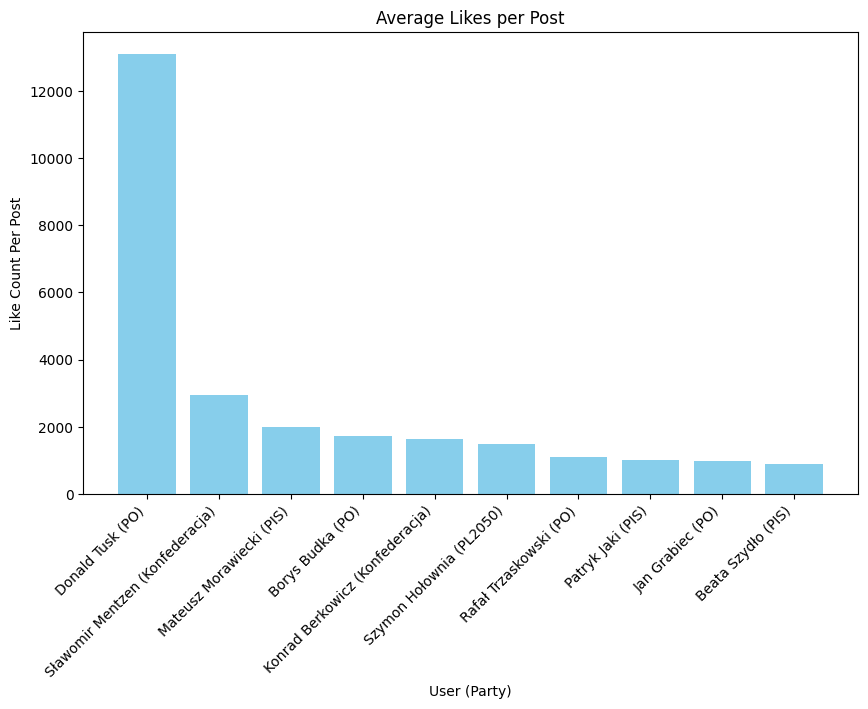

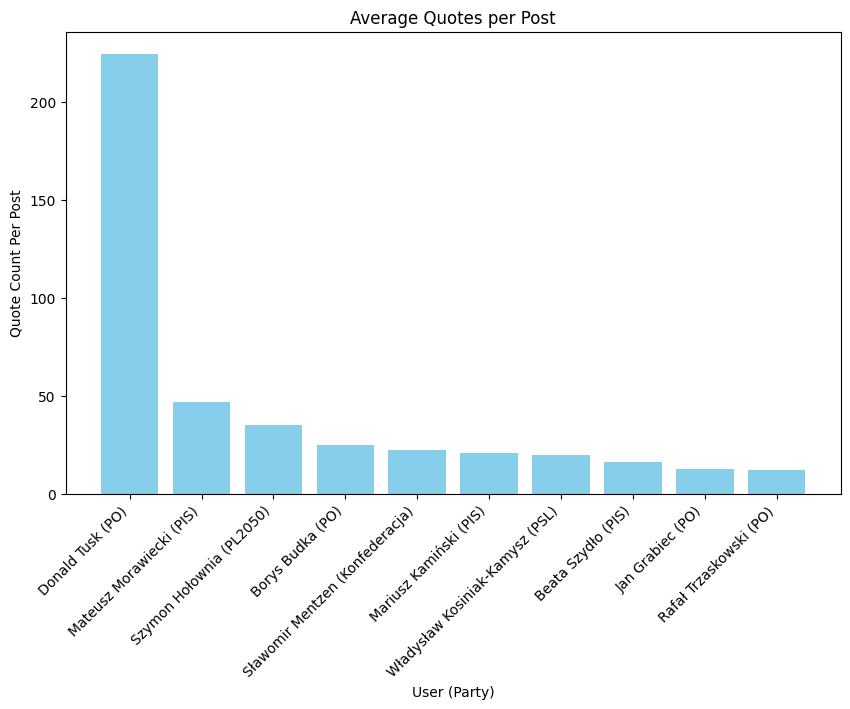

In [25]:
public_metrics_summary_user = df.groupby('name')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

total_posts_per_user = df['name'].value_counts().reset_index()
total_posts_per_user.columns = ['name', 'total_posts']

public_metrics_summary_user = public_metrics_summary_user.merge(total_posts_per_user, on='name')

public_metrics_summary_user['retweet_count_per_post'] = public_metrics_summary_user['retweet_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['reply_count_per_post'] = public_metrics_summary_user['reply_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['like_count_per_post'] = public_metrics_summary_user['like_count'] / public_metrics_summary_user['total_posts']
public_metrics_summary_user['quote_count_per_post'] = public_metrics_summary_user['quote_count'] / public_metrics_summary_user['total_posts']

public_metrics_summary_user = public_metrics_summary_user.merge(df[['name', 'party']].drop_duplicates(), on='name', how='left')

metrics = ['retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']
titles = ['Average Retweets per Post', 'Average Replies per Post', 'Average Likes per Post', 'Average Quotes per Post']

for i, metric in enumerate(metrics):
    sorted_df = public_metrics_summary_user.sort_values(by=metric, ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_df['name'] + ' (' + sorted_df['party'] + ')', sorted_df[metric], color='skyblue')
    plt.xlabel('User (Party)')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(titles[i])
    plt.xticks(rotation=45, ha='right')
    plt.show()

Donald Tusk from PO is the most influential politician in Poland, exhibiting the highest engagement in response to his posts among all politicians.

# 4. Conclusions

  1. The three most active users are Marcin Kulasek (NL), Marcin Kierwiński (PO), and Krzysztof Śmieszek (NL). Each of them published around 2000 tweets in one year, averaging more than 2.5 tweets per day.  
  2. The activity of politicians on X overlaps with important events in Poland. Peaks in activity are observed after the parliamentary election, the appointment of the Council of Ministers, and during the Euroelection and the flood in 2024.  
  3. The most common tweet lengths are very short (up to 5 words) and around 10 words. Interestingly, there is also a notable peak at around 40 words. Each party shows a significant number of tweets with approximately 40 words.  
  4. Politicians in Nowa Lewica use, on average almost one emoji per tweet, while those in PL2050 use only 0.3 emojis per tweet on average.  
  5. PO and PIS consistently attract the highest engagement, leading in average values across all public metrics. These two parties alternate in the top positions depending on the metric, while other parties show significantly lower levels of engagement.
  6. Donald Tusk from PO is the most influential politician in Poland, exhibiting the highest engagement in response to his posts among all politicians.